huzujun 

资料整理自

https://www.kaggle.com/code/huzujun/xiaohongshu-data-mining/notebook

<br>

## 安装相关库

In [ ]:
!pip install dtreeviz==1.3.3
!pip install emoji
!pip install plotly

<br><br>

## 一、导入数据

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('xiaohongshu.csv')

print(len(df))
df.head()

5928


index                                               desc  \
0      0  备孕不易，作为护士备孕三个月终于好孕，分享经验给姐妹们\n✅\n我的体质：从小到大，一到天气...   
1      1  刷到小红书有很多姐妹，说自己相亲的经历。我想了下我爸八次相亲，经验丰富，啥奇葩都遇到过。好想...   
2      2  刚毕业上班的小白，想开个网店当个副业，只是没有经验，小红里的大神们有没有教教的？#电商  #...   
3      3  来英国不小心把近视镜弄坏又不知道怎么去店里配的伙伴们可以参考一下我的经验（仅限于了解自己眼睛...   
4      4  哈哈有人比我隔離得多嗎？可以來分享一下～\n-\n以下根據個人經驗分享 不一定適用每個人‼️...   

                                            keywords  \
0                                            母婴,孕产经验   
1                                              情感,两性   
2                       网店,电商,新手,副业,新手无货源做网店,教育,职场行业   
3         镜框,眼镜,香奈儿怎么样,留学,古驰怎么样,近视镜,近视,留学英国,时尚,配饰,眼镜   
4  酒店,面膜,睡衣,隔离,筷子,核酸,厚街攻略,韩国,奶茶,水果,隔离酒店,出行,出行攻略,其他攻略   

                    user_id                 time                 title  \
0  5b5bd62111be105f66085727  2021-10-13 11:06:00    作为护士备孕三个月终于好孕 经验分享   
1  5b1aa17d11be105e57c4a4e3  2021-10-13 11:02:00                 相亲经验贴   
2  608a167d000000000101fa11  2021-10-13 10:52:00    想请问大家开网店有什么技巧或者经验嘛   
3  540c53d8b4c4d60fd99b3e03  2021-10-13 10:36:00            英国线上配镜经验分享   
4  5aca51eb4eacab2fa277b366  2021-10-13 10:16:00  隔離4次的經驗｜酒店隔離準備這些東西👍🏻   

   liked_count  image_nums     nickname search_word  desc_len  title_len  \
0            4           3        不要难过呀          经验       503         18   
1            0           1           小厶          经验        58          5   
2            2           1         CXiN          经验        55         18   
3            0           7          Mhm          经验       342         10   
4            4           8  Béatrice 비아          经验       988         20   

   hours  heat  
0     11     1  
1     11     1  
2     10     1  
3     10     1  
4     10     1

<br><br>

## 二、数据预处理

列是series类型数据， 使用apply方法(应用lambda函数)对列进行批处理。 

这里可以做很多事情，例如
- desc的文本长度、表情数量
- title标题的长度
- 几点发文(24小时制的)
- ...

In [2]:
import emoji

#desc中的表情数量
df['emoji_nums'] = df['desc'].apply(lambda desc: len(emoji.emoji_list(desc)))

#话题tag数量
df['hashTag_nums'] = df['desc'].str.count('#')

#标题title的文本长度
df['title_len'] = df['title'].str.len()
df['desc_len'] = df['desc'].str.len()
#几点发文
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['hours'] = df['time'].dt.hour

#把文本数字转为数值型数字
df['image_nums'] = df['image_nums'].astype('int')
df['liked_count'] = df['liked_count'].astype('int')

#显示前5行
df[['emoji_nums', 'hashTag_nums', 'title_len', 'desc_len', 'hours', 'image_nums', 'liked_count']].head()

emoji_nums  hashTag_nums  title_len  desc_len  hours  image_nums  \
0           8             1         18       503     11           3   
1           0             1          5        58     11           1   
2           0             2         18        55     10           1   
3           5             1         10       342     10           7   
4          31             4         20       988     10           8   

   liked_count  
0            4  
1            0  
2            2  
3            0  
4            4

<br><br>

## 三、数据分析
## 3.1 处理点赞数
看一下点赞数的数据分布

In [3]:
df.liked_count.describe()

count     5928.000000
mean       157.174764
std        713.708655
min          0.000000
25%          2.000000
50%         15.000000
75%         69.000000
max      22265.000000
Name: liked_count, dtype: float64

Text(0.5, 1.0, 'liked_count核密度分布图')

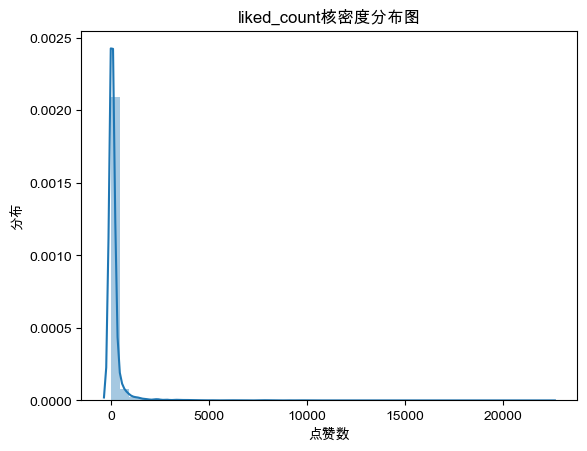

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import platform
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'svg')

system = platform.system()  # 获取操作系统类型

if system == 'Windows':
    font = {'family': 'SimHei'}
elif system == 'Darwin':
    font = {'family': 'Arial Unicode MS'}
else:
    # 如果是其他系统，可以使用系统默认字体
    font = {'family': 'sans-serif'}
matplotlib.rc('font', **font)  # 设置全局字体


sns.distplot(df.liked_count)
plt.xlabel('点赞数')
plt.ylabel('分布')
plt.title('liked_count核密度分布图')

In [5]:
print(df.liked_count.min())
print(df.liked_count.median())
print(df.liked_count.max())

0
15.0
22265



这里可以看出一个问题，点赞数具有很强的长尾效应，也就是说一半的文章点赞数小于15，而热门的文章点赞数可以上千上万，因此如果直接分析点赞数的数值，用回归之类的算法去分析，一定是灾难，所以我们不妨简单处理，在这里我先人为定义点赞数>=50为热帖，其它的不是热帖，通过这个方式把笔记分成了两类

In [6]:
df["heat"] = pd.cut(df["liked_count"], bins=[-1, 50, 22266], labels=['凉帖', '热帖'])

<br><br>

## 3.2 分析热帖比例和小时的关系

In [7]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

heats = []
for i in range(24):
    hour_df = df[df['hours'] == i]
    heats.append(len(hour_df[hour_df['heat'] == '热帖'])/len(hour_df))

layout = {'title': '24小时随时间热帖图'}
fig = go.Figure(data=[{'x': list(range(0, 24)), 'y': heats}], layout = layout)
plotly.offline.iplot(fig)

<br><br>

## 3.3 分析热帖比例和表情数的关系

In [8]:
df["emoji_nums"].describe()

count    5928.000000
mean        6.824055
std         9.996283
min         0.000000
25%         0.000000
50%         3.000000
75%        10.000000
max       103.000000
Name: emoji_nums, dtype: float64

Text(0.5, 1.0, 'emoji表情数核密度分布图')

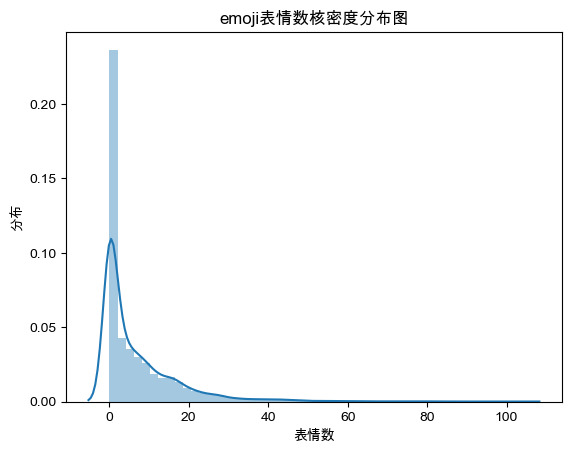

In [9]:
sns.distplot(df.emoji_nums)
plt.xlabel('表情数')
plt.ylabel('分布')
plt.title('emoji表情数核密度分布图')

In [10]:
import plotly.offline as py
import plotly.graph_objs as go

df["emoji_level"] = pd.cut(df["emoji_nums"], bins=[-1, 4, 90], labels=['表情少', '表情多'])

emoji_levels = []
for i in ['表情少', '表情多']:
    emoji_df = df[df['emoji_level'] == i]
    emoji_levels.append(len(emoji_df[emoji_df['heat'] == '热帖'])/len(emoji_df))

import plotly.express as px
colors = ['blue', 'red']
fig = go.Figure(data=[go.Bar(
    x=['表情数<=4', '表情数>4'],
    y=emoji_levels,
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='表情数-热帖占比')
plotly.offline.iplot(fig)



<br><br>

## 3.4 分析热帖比例和标签的关系
我原本以为的是“适当的标签最好，不是越多越好”，结果推翻了我的猜想

In [11]:
df["hashTag_nums"].describe([i/10 for i in range(1, 11)])

count    5928.000000
mean        3.638327
std         4.077919
min         0.000000
10%         0.000000
20%         0.000000
30%         1.000000
40%         2.000000
50%         3.000000
60%         3.000000
70%         4.000000
80%         6.000000
90%         9.000000
100%       49.000000
max        49.000000
Name: hashTag_nums, dtype: float64

In [12]:
df["hashTags_level"] = pd.cut(df["hashTag_nums"], bins=[-1, 1, 2, 3, 4, 6, 9, 49], labels=[1, 2, 3, 4, 5, 6, 7])

emoji_levels = []
for i in range(1, 8):
    con = df[df['hashTags_level'] == i]
    emoji_levels.append(len(con[con['heat'] == '热帖'])/len(con))

import plotly.express as px
fig = go.Figure(data=[go.Bar(
    x=['<= 1 hashTags', '1 < hashTags <= 2', '2 < hashTags <= 3', '3 < hashTags <= 4', '4 < hashTags <= 6',
      '6 < hashTags <= 9', '9 < hashTags <= 49'],
    y=emoji_levels, # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='话题数-热帖占比')
plotly.offline.iplot(fig)

In [13]:
df[df['hashTag_nums'] > 9].describe()

index  liked_count  image_nums     desc_len   title_len  \
count   473.000000   473.000000  473.000000   473.000000  473.000000   
mean   3380.308668   151.856237    7.617336   522.501057   19.733615   
std    1236.477383   463.196215    2.280043   214.154428    3.253562   
min     103.000000     0.000000    1.000000    63.000000    6.000000   
25%    2596.000000    17.000000    7.000000   371.000000   19.000000   
50%    3376.000000    44.000000    9.000000   515.000000   20.000000   
75%    4404.000000   114.000000    9.000000   676.000000   21.000000   
max    5817.000000  7833.000000    9.000000  1093.000000   30.000000   

            hours  emoji_nums  hashTag_nums  
count  473.000000  473.000000    473.000000  
mean    15.078224   14.192389     13.642706  
std      5.125978   12.428566      5.562933  
min      0.000000    0.000000     10.000000  
25%     11.000000    5.000000     10.000000  
50%     16.000000   12.000000     12.000000  
75%     19.000000   20.000000     14.000000  
max     23.000000   78.000000     49.000000



<br><br>

## 3.5 决策树模型
这里我们尝试用这些因子去预测帖子是否热门，我挑选的是决策树，虽然别的模型可能会搞出几个百分点的准确率，但是必要性不是很大，在这里我更想要看到可解释性强的结果，而不是黑盒模型，这是决策数的优点，因为预测是否热帖这个事情不是我们的目的。

In [14]:
df['liked_count'].describe()

count     5928.000000
mean       157.174764
std        713.708655
min          0.000000
25%          2.000000
50%         15.000000
75%         69.000000
max      22265.000000
Name: liked_count, dtype: float64

决策树模型要求种类要平衡，这里有两种解决方法：
- 对不平衡的种类重新取样
- 这里因为数据本来就不算很多，我就人为重新定义了中位数作为热帖的分水岭

In [15]:
df["heat"] = pd.cut(df["liked_count"], bins=[-1, 15, 22266], labels=[1, 2])
print(len(df[df["heat"] == 1]), len(df[df["heat"] == 2]))

2982 2946


决策树模型根据尝试，在最大深度为3时近似就能取到很好的准确率了

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df["heat"] = pd.cut(df["liked_count"], bins=[-1, 15, 22266], labels=[1, 2])
df["emoji_level"] = pd.cut(df["emoji_nums"], bins=[-1, 4, 90], labels=[1, 2])

cols = ['image_nums',  'desc_len', 'title_len', 'hashTags_level' ,'emoji_level', 'hours']
X = df[cols]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = df['heat']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(len(X_train), len(y_test))

clf = DecisionTreeClassifier(max_depth = 3)

clf.fit(X_train, y_train)

print(accuracy_score(clf.predict(X_test), y_test))

4446 1482
0.699055330634278


70%的准确率意味着比乱猜的50%要好不少，在我们完全没有去关注帖子内容，仅仅只根据图片数、文本长度来预测是否热帖已经有这个准确率，已经是非常好了。

我们可视化决策树

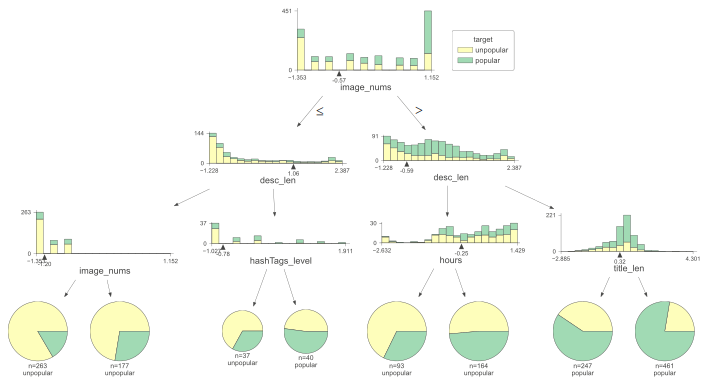

In [17]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(clf, X_test, y_test,
                target_name="target",
                feature_names=cols,
                class_names=['unpopular', 'popular'])
viz.save("viz.svg")
viz

可视化决策树的结论：
一般来说，越多的图片、越长的标题、越长的正文能**显著**获得更高的热贴机会，这是根据决策树的结果得到的。不过如果图片和标题信息量足够了，正文不用特别长也可以了。


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(random_state=888, max_depth = 4)
forest.fit(X_train, y_train)

print(accuracy_score(forest.predict(X_test), y_test))

0.7031039136302294


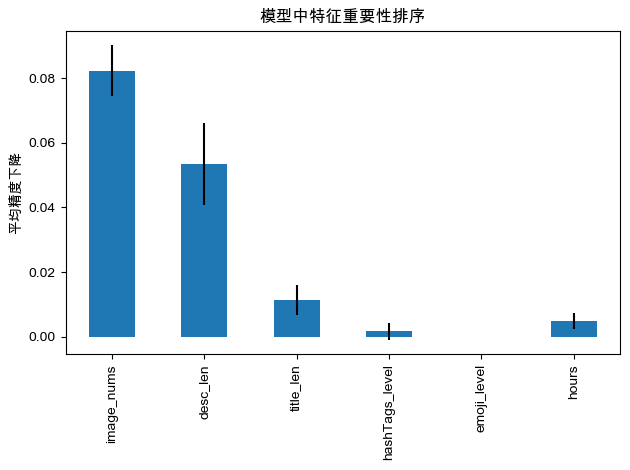

In [20]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

result = permutation_importance(forest, X_test, y_test, 
                                n_repeats=10, random_state=42, n_jobs=2)

forest_importances = pd.Series(result.importances_mean, index=cols)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("模型中特征重要性排序")
ax.set_ylabel("平均精度下降")
fig.tight_layout()
plt.show()